# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [38]:
# stundent details example: John S. 9812
#                       student details 1: Meitar L. 7545
# (if exists)           student details 2:
# (if exists)           student details 3:
# (if exists&premitted) student details 4:

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT (OpenAI)
Goal: To assist with building the complete supervised learning pipeline for the Breast Cancer Wisconsin dataset — including data loading, preprocessing, visualization, model training, evaluation, and final submission preparation.

Propmpt1: What should I include in Part 1 of my supervised learning assignment?
    
Propmpt2: Help me understand how to load and prepare the breast cancer dataset from CSV files in pandas.
    
Propmpt3: Show me how to run EDA, visualize feature correlations, and train multiple models like Logistic Regression and Random Forest using scikit-learn with 5-fold cross-validation.

Propmpt4: How can I evaluate classification models using f1-score (macro), compare them in a table, and choose the best performing model?

Propmpt5: How can I write a good summary paragraph for the dataset and the machine learning problem in Part 1(c)?

AI agent name 2: Google Bard (Gemini)
Goal: To get a quick summary of the Breast Cancer Wisconsin dataset and confirm the class labels used in the classification task.

Propmpt1: What are the class labels in the Breast Cancer Wisconsin (Diagnostic) dataset?

Propmpt2: How many features are in this dataset and what do they describe?

Propmpt3: Can you explain what concavity and fractal dimension mean in this context?

Other assistance: None    
</pre>


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The learning problem in this project is a supervised binary classification task using the Breast Cancer Wisconsin (Diagnostic) dataset. The goal is to classify tumors as either malignant (0) or benign (1) based on 30 numerical features extracted from digitized images of fine needle aspirate (FNA) of breast masses. These features include measurements of radius, texture, area, smoothness, compactness, concavity, symmetry, and more — each calculated as the mean, standard error, and worst value for a total of 30 attributes. The dataset includes 569 samples in total, split into 455 training samples and 114 test samples, with no missing values. This task aims to support medical diagnosis by enabling machine learning models to accurately and automatically identify potential cases of breast cancer.
</pre>


## Part 2 - Initial Preparations
You could add as many code cells as needed

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:

#load + 5 1st rows

df_train = pd.read_csv('cancer_train.csv')
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [41]:

#load + 5 1st rows

df_test = pd.read_csv('cancer_test.csv')
df_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


## Part 3 - Experiments
You could add as many code cells as needed

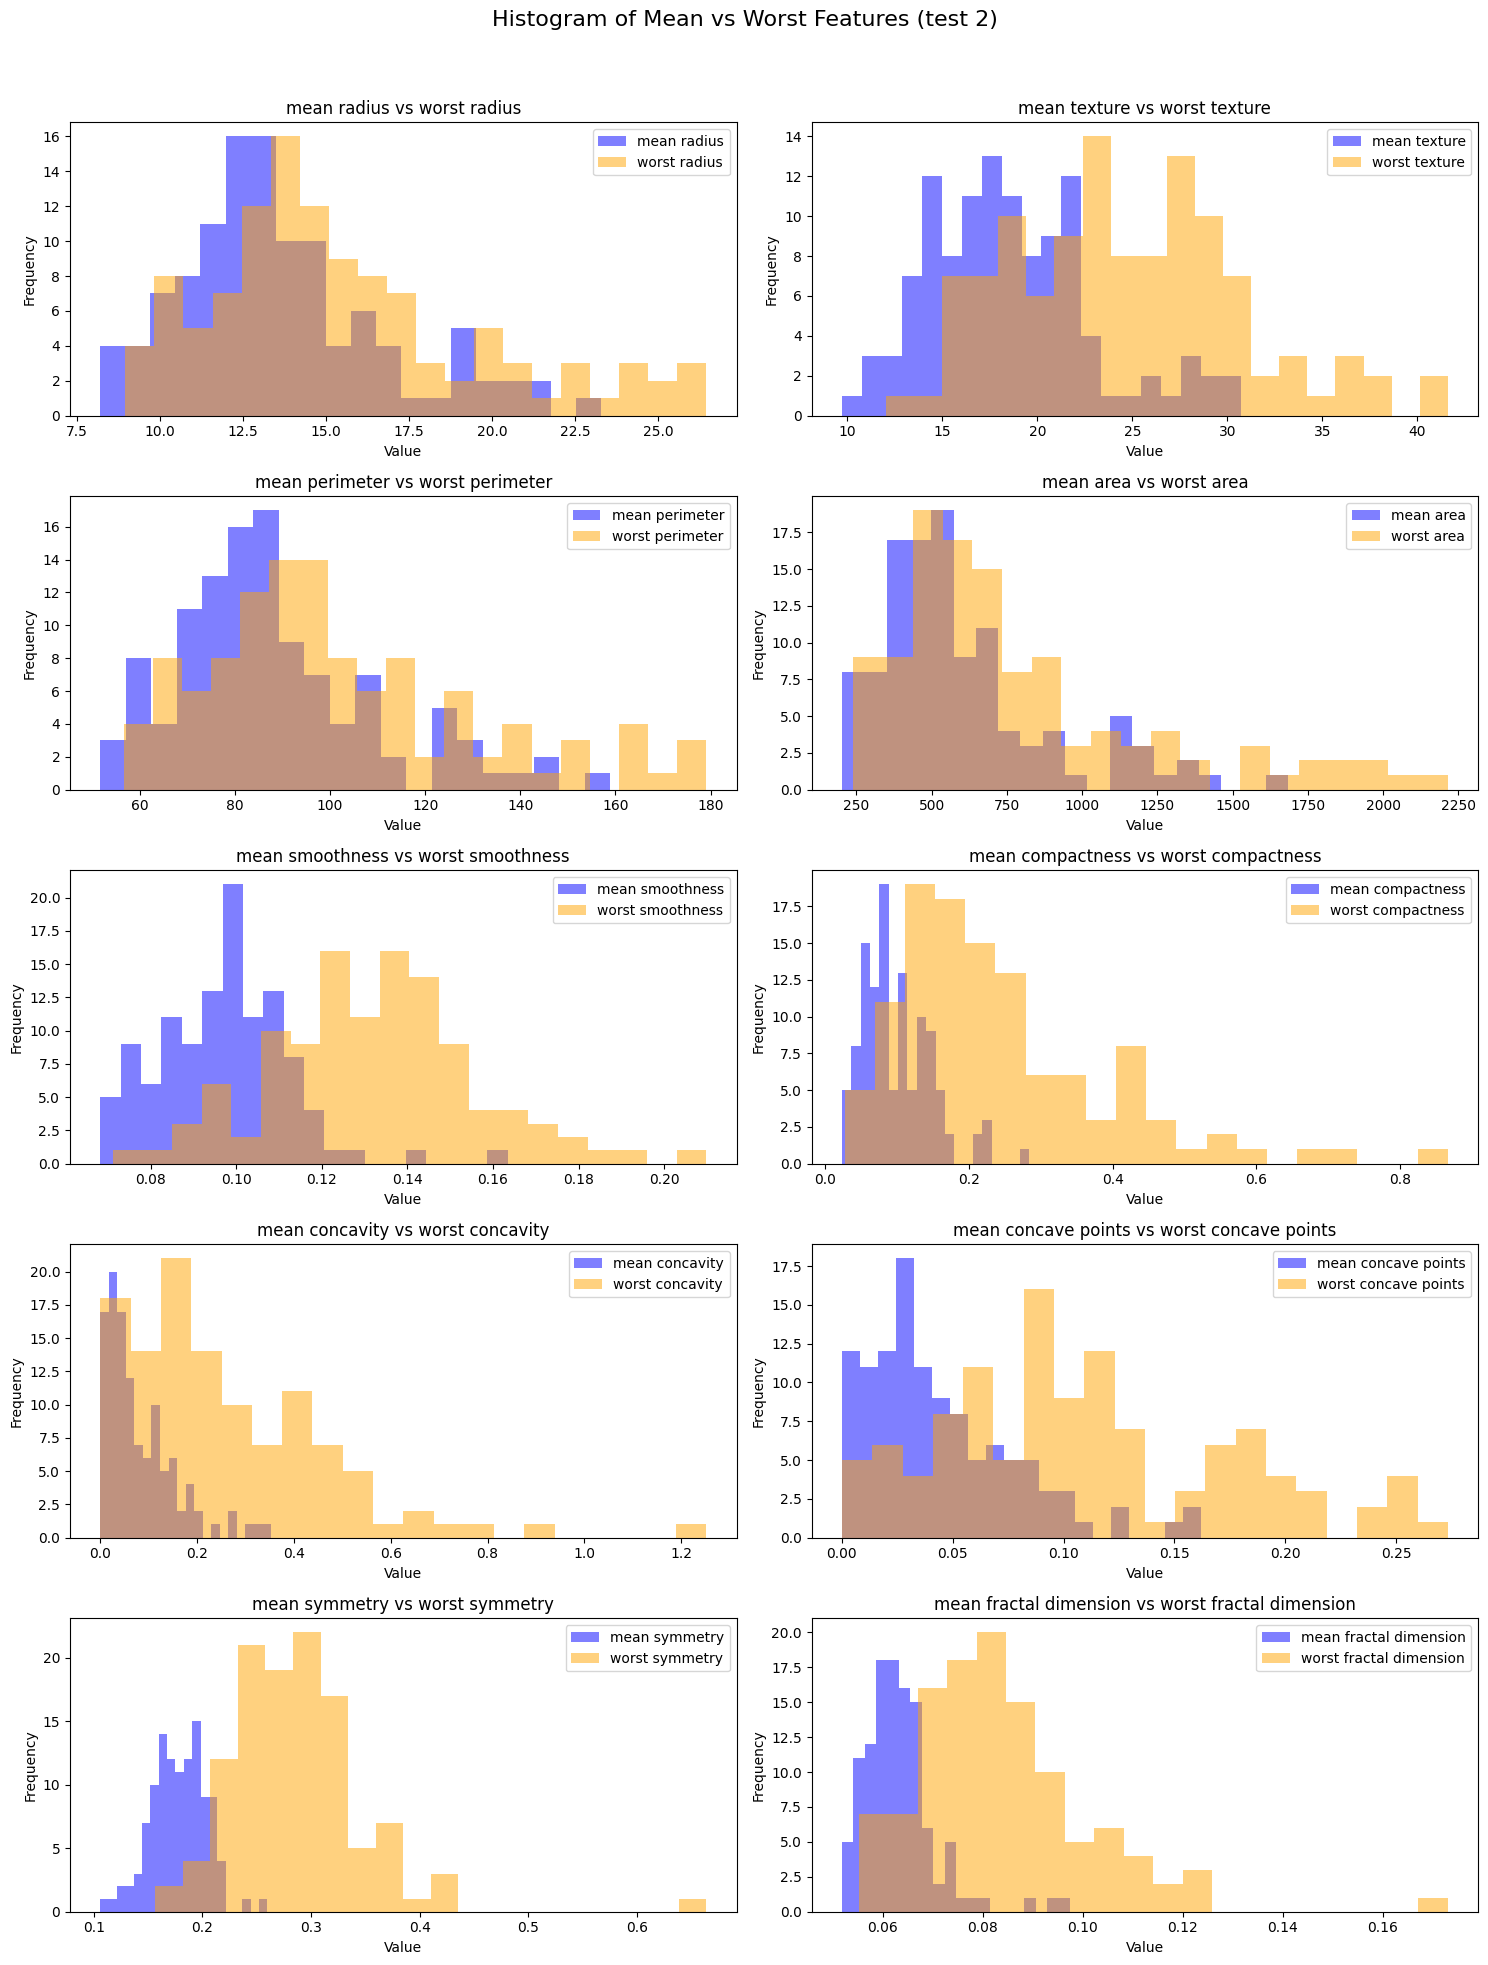

In [42]:

# visualizations Histogram for Mean vs. Worst Features (test2)
#histograms for pairs of mean and worst features from the test dataset,
#visualizing the distribution of each feature and comparing the distributions of mean and worst values

feature_pairs = [
    ('mean radius', 'worst radius'),
    ('mean texture', 'worst texture'),
    ('mean perimeter', 'worst perimeter'),
    ('mean area', 'worst area'),
    ('mean smoothness', 'worst smoothness'),
    ('mean compactness', 'worst compactness'),
    ('mean concavity', 'worst concavity'),
    ('mean concave points', 'worst concave points'),
    ('mean symmetry', 'worst symmetry'),
    ('mean fractal dimension', 'worst fractal dimension')
]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Histogram of Mean vs Worst Features (test 2)', fontsize=16)

# Plot each pair
for (mean_feature, worst_feature), ax in zip(feature_pairs, axes.flatten()):
    ax.hist(df_test[mean_feature], bins=20, alpha=0.5, label=mean_feature, color='blue')
    ax.hist(df_test[worst_feature], bins=20, alpha=0.5, label=worst_feature, color='orange')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{mean_feature} vs {worst_feature}')
    ax.legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [43]:

# Feature Enginnering Feature Scaling->Standardization
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the head of the transformed datasets
print("Head of the scaled training set:")
print(X_train_scaled_df.head())

print("\nHead of the scaled test set:")
print(X_test_scaled_df.head())

Head of the scaled training set:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.301413     -0.193292       -0.277010  -0.367890         1.420887   
1    -1.271942     -0.233227       -1.260732  -1.041995        -0.490928   
2     1.615819      1.028240        1.679991   1.588252         0.854745   
3    -1.470591     -0.874532       -1.371194  -1.162538        -0.116404   
4     1.045082     -0.618480        0.989096   0.882569        -0.490203   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.327833        0.391801             0.589345       1.106432   
1         -0.796395       -0.757427            -0.878776       1.501197   
2          1.455405        1.696282             1.965235       1.540674   
3          0.350125        0.021930            -0.678692      -1.847132   
4          0.329691        0.223958             0.315679      -0.357789   

   mean fractal dimension  ...  worst radius  worst texture

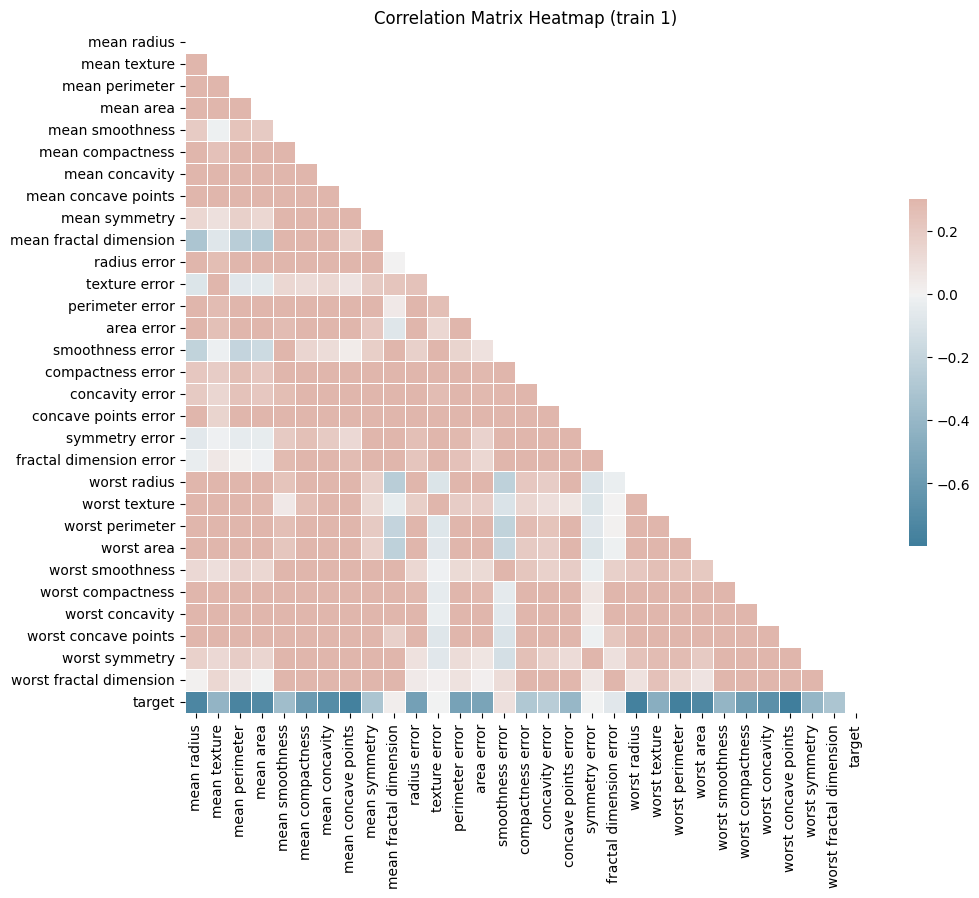

In [44]:
# visualizations Correlation Matrix with ..Heatmap.. (train 1)
# using a heatmap, highlighting the relationships between different features
# Red or darker colors typically indicate stronger positive correlations.
# Blue or lighter colors indicate stronger negative correlations.

corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap (train 1)')
plt.show()

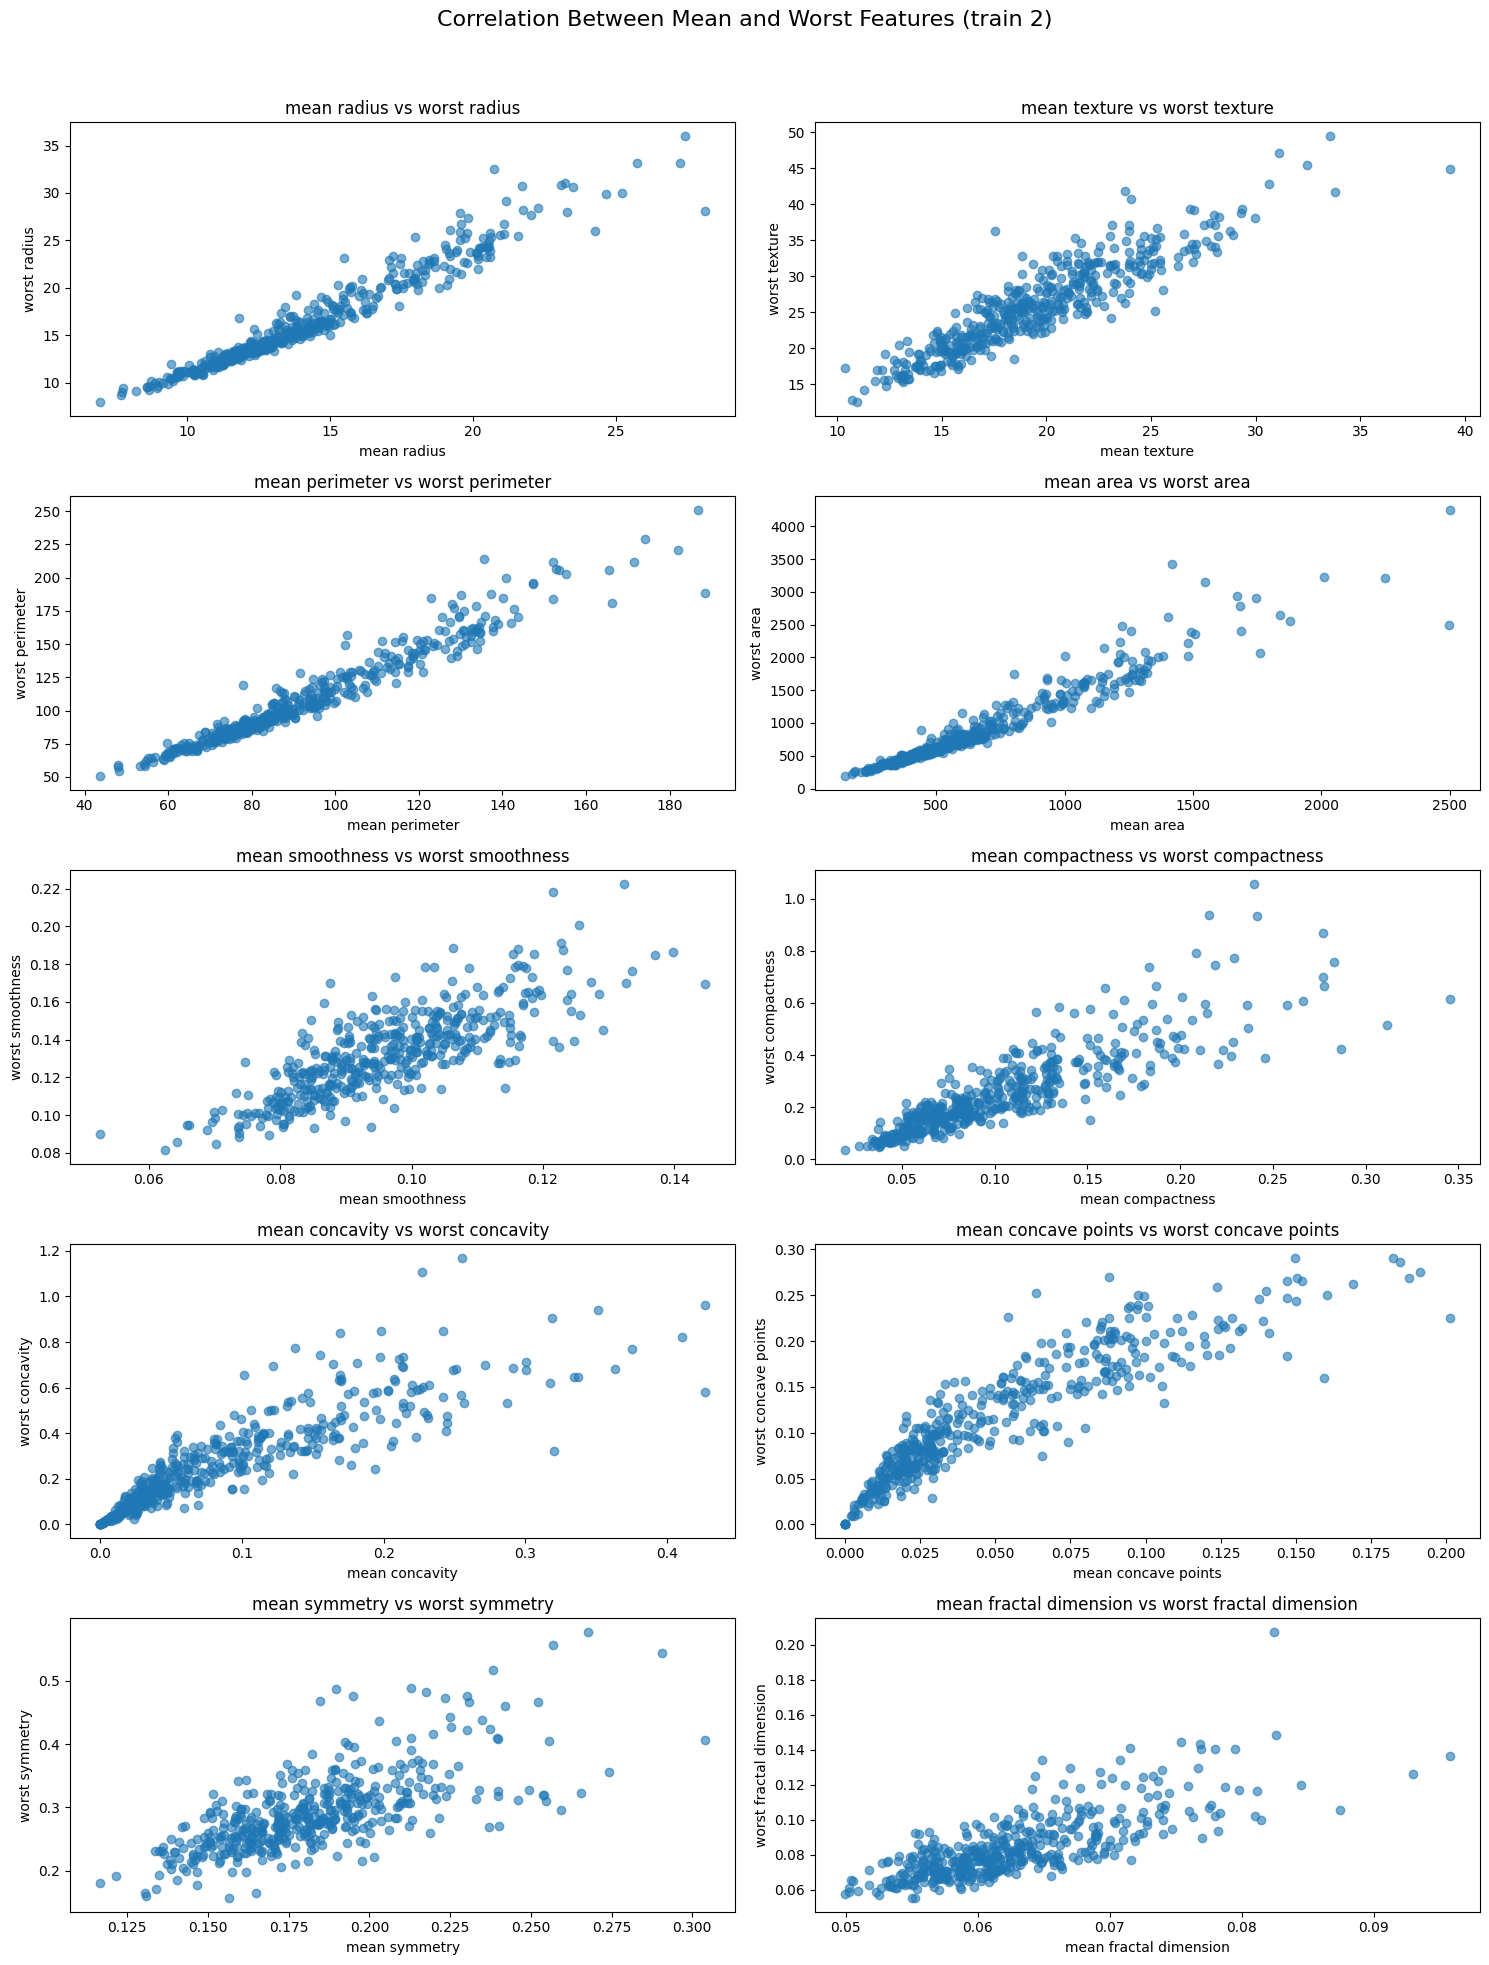

In [45]:

# visualizations Scatter Plot Matrix for Mean vs. Worst (train 2)
#scatter plots to visualize the correlation between each pair of
#'mean' and 'worst' features in the training dataset, helping to understand their relationships

feature_pairs = [
    ('mean radius', 'worst radius'),
    ('mean texture', 'worst texture'),
    ('mean perimeter', 'worst perimeter'),
    ('mean area', 'worst area'),
    ('mean smoothness', 'worst smoothness'),
    ('mean compactness', 'worst compactness'),
    ('mean concavity', 'worst concavity'),
    ('mean concave points', 'worst concave points'),
    ('mean symmetry', 'worst symmetry'),
    ('mean fractal dimension', 'worst fractal dimension')
]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Correlation Between Mean and Worst Features (train 2)', fontsize=16)

# Plot each pair
for (mean_feature, worst_feature), ax in zip(feature_pairs, axes.flatten()):
    ax.scatter(df_train[mean_feature], df_train[worst_feature], alpha=0.6)
    ax.set_xlabel(mean_feature)
    ax.set_ylabel(worst_feature)
    ax.set_title(f'{mean_feature} vs {worst_feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [46]:
# trains a Random Forest classifier on the training data
# makes predictions on the test data
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Predict and calculate accuracy for Random Forest
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9649122807017544


## Part 5 - Apply on test and show model performance estimation

In [47]:

# evaluates the performance of the trained Random Forest classifier
# on the test data by predicting labels and calculating accuracy

# Use the trained Random Forest classifier to predict labels for the test data
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.99      0.96      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [48]:
# the actual and predicted values from the Random Forest model predictions on the test data

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Print the first 20 rows
print("First 20 rows:")
print(results_df.head(20))

# Print the last 20 rows
print("\nLast 20 rows:")
print(results_df.tail(20))

First 20 rows:
    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        1          1
5        1          1
6        0          0
7        1          1
8        1          1
9        1          1
10       0          1
11       1          1
12       1          1
13       1          1
14       1          1
15       1          1
16       1          1
17       1          1
18       0          0
19       1          1

Last 20 rows:
     Actual  Predicted
94        1          1
95        1          1
96        1          1
97        1          1
98        1          1
99        0          0
100       1          1
101       1          1
102       1          1
103       0          0
104       1          1
105       1          1
106       1          1
107       0          0
108       1          1
109       0          0
110       1          1
111       1          1
112       1          1
113       0          0
